In [8]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [9]:
import sys
sys.path.append('./src')  # Add src folder to path

from mba_model import load_data, create_basket, generate_rules, get_recommendations, get_top_products

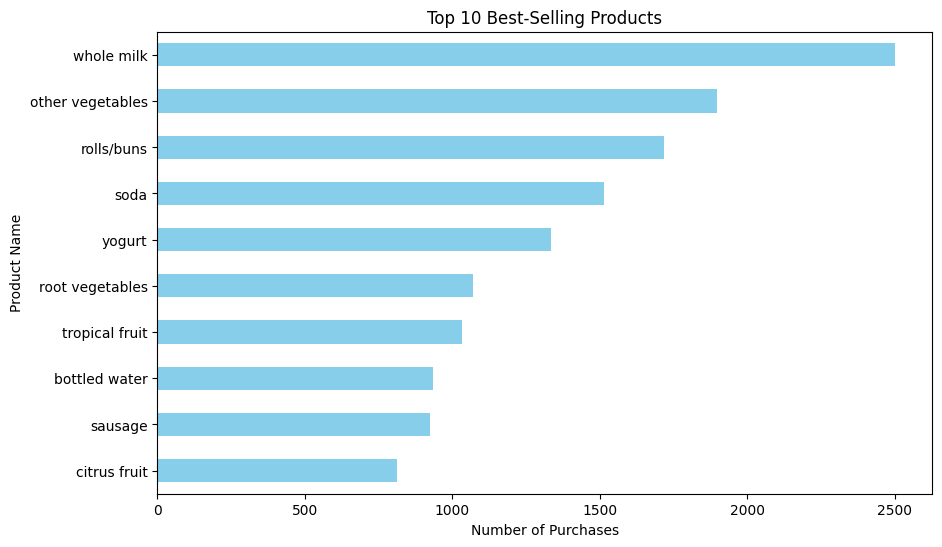

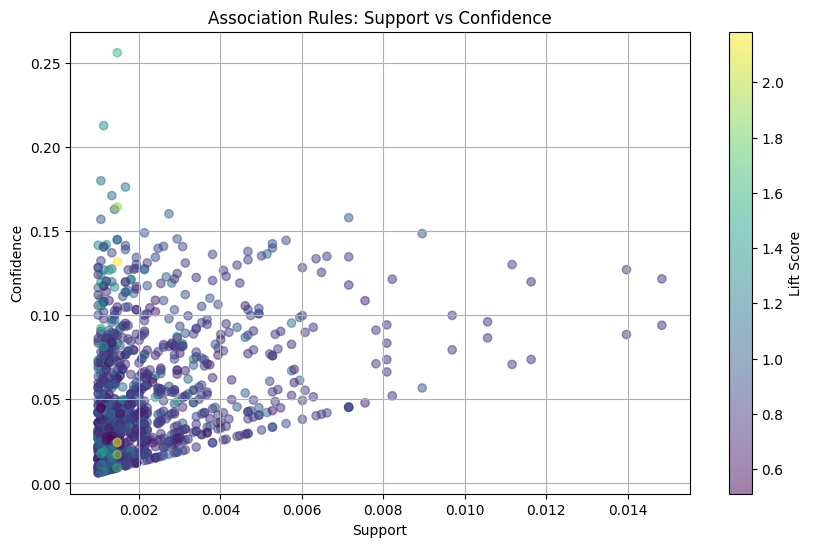

In [ ]:
# Load Data
data_path = "data/groceries.csv"
# After this code:
#data = load_data("data/groceries.csv")

# Add this visualization:
import matplotlib.pyplot as plt

# Plot top 10 products
plt.figure(figsize=(10, 6))
data['itemDescription'].value_counts().head(10).sort_values().plot(kind='barh', color='skyblue')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Number of Purchases")
plt.ylabel("Product Name")
plt.show()
data = load_data(data_path)
basket = create_basket(data)
rules = generate_rules(basket)

# After this code:
#rules = generate_rules(basket)

# Add this visualization:
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5, c=rules['lift'], cmap='viridis')
plt.colorbar(label='Lift Score')
plt.title("Association Rules: Support vs Confidence")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.grid(True)
plt.show()

# Get product list
product_list = sorted(data['itemDescription'].dropna().unique())

# User Input
selected_product = input(f"Enter product (from {product_list[:5]}...): ").strip()

# Get Recommendations
if selected_product in product_list:
    recommendations = get_recommendations(rules, selected_product)
    
    if recommendations:
        print("\nTop Recommendations:")
        for rec in recommendations[:5]:  # Show top 5
            print(f"- {rec}")
    else:
        print("\nNo strong rules found. Top selling products:")
        for prod in get_top_products(data)[:5]:
            print(f"- {prod}")
else:
    print("Invalid product selection!")